# Creating smooth spatial fields

In [1]:
using Revise

In [2]:
using CartesianGrids

┌ Info: Precompiling CartesianGrids [3e975e5d-2cf8-4263-9573-8460aaf534d9]
└ @ Base loading.jl:1278


In [9]:
using Plots

In [4]:
f = Gaussian(0.2,0,1)

Gaussian(0.2, 0, 1, 2.8209479177387813)

In [15]:
f(0.2)

1.0377687435514866

In [45]:
σ = rand()

0.43319041118963253

In [46]:
onegauss = SpatialGaussian(σ,σ,0.0,0.5,1)

SpatialGaussian{false,Gaussian,Gaussian}(Gaussian(0.43319041118963253, 0.0, 1, 1.302405521854402), Gaussian(0.43319041118963253, 0.5, 1, 1.302405521854402), 1.0, 0.0, 0.0)

In [8]:
onegauss(σ,0.5)

0.9336930666686454

In [9]:
onegauss(rand(2)...)

0.05402804158028343

In [12]:
field = EmptySpatialField()
for x in [-0.5,0,0.5], y in [-0.5,0,0.5]
  field += SpatialGaussian(0.2,0.5,x,y,1,0.5,1)
end

In [14]:
field(0.5,0,1)

1.2344376654766014

In [15]:
field2 = -field;

In [17]:
field2(0.5,0,1)

-1.2344376654766014

In [29]:
gr = PhysicalGrid((-3.0,3.0),(-2.0,2.0),0.03)

PhysicalGrid{2}((208, 140), (104, 70), 0.03, ((-3.09, 3.09), (-2.07, 2.07)))

In [30]:
w = Nodes(Dual,size(gr));
xg, yg = coordinates(w,gr)

(-3.105:0.03:3.105, -2.085:0.03:2.085)

In [35]:
@time gfield = GeneratedField(w,field,gr);

  0.107989 seconds (4.22 M allocations: 85.539 MiB, 23.94% gc time)


In [38]:
datatype(gfield)

Nodes{Dual,208,140,Float64,Array{Float64,2}}

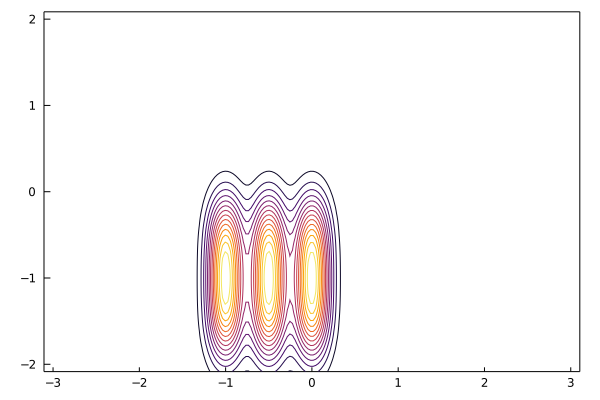

In [39]:
plot(gfield(-1.0),gr)

In [52]:
q = Edges(Primal,w);

In [53]:
@time qfield = GeneratedField(q,field,onegauss,gr);

  0.111673 seconds (4.60 M allocations: 94.002 MiB, 18.08% gc time)


In [56]:
@time q .= qfield(-2);

  0.120794 seconds (4.34 M allocations: 89.587 MiB, 17.25% gc time)


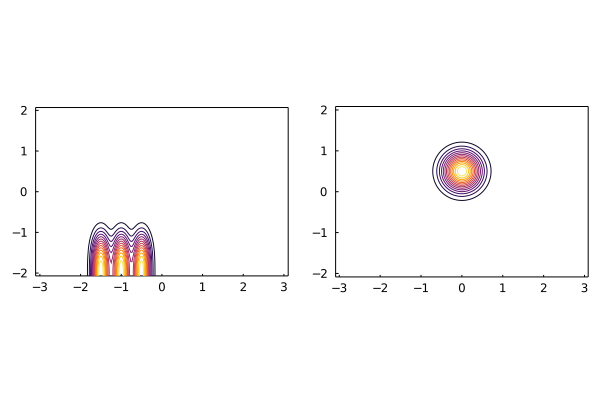

In [57]:
plot(
    plot(q.u,gr),
    plot(q.v,gr)
    )

In [58]:
tfield = GeneratedField(EdgeGradient(Dual,q),[field,SpatialGaussian(0.5,0,0,1),EmptySpatialField(),EmptySpatialField()],gr);

In [59]:
maximum(tfield().dudy)

1.2732395447351625

In [60]:
ffield = PulseField(tfield,0.5,0.1);
xux, yux = coordinates(tfield().dudx,gr)
xuy, yuy = coordinates(tfield().dudy,gr)

(-3.09:0.03:3.09, -2.07:0.03:2.07)

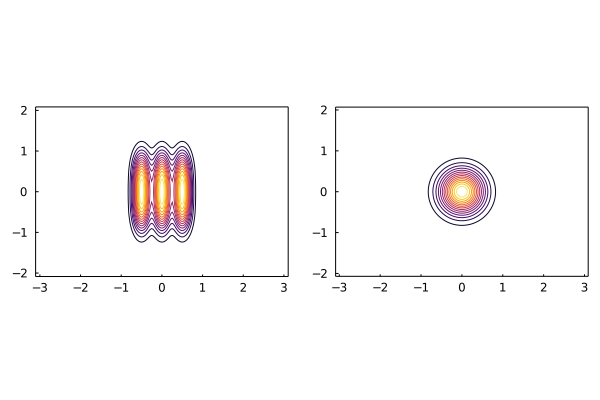

In [61]:
plot(
    plot(xux,yux,ffield(0.5).dudx),
    plot(xuy,yuy,ffield(0.5).dudy)
    )